<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/CNN/CNN_Creditcard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a CNN using tensorflow. In this tutorial, I used a dataset from Kaggle. This example shows how to connect and downlaod data from Kaggle.com

Written by: Arjang Fahim Date: 10-25-2021 Updated: 4-25-2022

# Step 1: Installation and Setup

  Colab already installed tensorflow versions 1.x and 2.0,
  GPU and non GPU versions.
  For more information please check
  https://colab.research.google.com/notebooks/tensorflow_version.ipynb



In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle to Colab

In [ ]:
# Installing Kaggle API on Colab
# I noticed in new Colab version the Kaggle API is already insta
! pip install Kaggle

In [ ]:
# Create a directory as Kaggle to keep Kaggle security jason file

! mkdir -p ~/.kaggle

For downloading data from kaggle:<br>


1.   Create an account on Kaggle.com
2.   On your account page, find and click on "Create New API token"
3.   This should download kaggle.json file on your local computer.
4.   The following code shows how to upload it to Colab for satisfying the
     Kaggle and Colab's security requirements













In [ ]:
# Importing Kaggle API security file (See above notes)

from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Copying API key to the Kaggle directory

! cp kaggle.json ~/.kaggle

In [ ]:
# Disabling API key

! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# The following code shows your connectivity to Kaggle works fine.
# If you see error then you need to check steps above.

! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            399        417  0.9375           
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           2111         48  0.8235294        
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-26 09:46:37          11884        650  1.0              


The dataset that is used in this exercise can be found here:<br>
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud<br>

To find the download command:


1.   Open the URL above
2.   Click on the three dots menu from right top of the screen and choose
     "Copy API command"
3.   Paste the command below

In [ ]:
# Importing dataset from Kaggle.com

! kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 161MB/s]
100% 66.0M/66.0M [00:00<00:00, 154MB/s]


In [ ]:
# Unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


# Step 3: DataProcessing

In [ ]:
dataset = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.shape

(284807, 31)

In [ ]:
# Check for the null values

dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Cheking the lables shows the classes (labels) are highly unbalanced

dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Balancing the dataset

fraud = dataset[dataset['Class'] == 1]
non_fraud = dataset[dataset['Class'] == 0]

In [ ]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# Random selection of the samples

random_non_fraud = non_fraud.sample(n=492)

In [ ]:
random_non_fraud.shape

(492, 31)

In [ ]:
# Merge randomly selected non_fraud with fraud datasets

dataset_balanced = fraud.append(random_non_fraud, ignore_index=True)

In [ ]:
print(dataset_balanced)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979  123948.0  1.933892 -0.060413 -0.758129  1.105567 -0.058055 -0.334702   
980  119445.0  1.911196 -0.365940  0.501557  1.395284 -1.095209 -0.044035   
981  115987.0  2.264876 -0.722758 -1.611333 -1.049922 -0.262712 -0.860625   
982   83641.0  1.062764 -0.272631  1.189833  1.740332 -0.822282  0.574660   
983   34806.0 -2.592673 -1.541721  2.838861  1.719493 -0.104723  1.215689   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [ ]:
# Check the balanced dataset label counts

dataset_balanced['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
# Defining the features matrix

X = dataset_balanced.drop(labels='Class', axis = 1)

In [ ]:
# Select and save labels separately

y = dataset_balanced['Class']

In [ ]:
X.shape, y.shape

((984, 30), (984,))

In [ ]:
# Splitting the X and y to train and test datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.69514435,  0.35146256, -0.16794809, ...,  0.51844407,
         0.59059104, -0.1857455 ],
       [-0.8186016 ,  0.52030738, -0.07710518, ...,  0.47087237,
         0.60547483, -0.38736559],
       [-0.85486511,  0.19910398,  0.11456158, ...,  0.30972508,
         0.46186183, -0.38657155],
       ...,
       [ 0.74312093,  0.09259263, -0.33925185, ..., -0.17538037,
        -0.51822172, -0.22445497],
       [-0.17280862,  0.43120495, -0.24368378, ...,  0.12829951,
         0.37762426, -0.37006212],
       [-0.63973706,  0.21501153, -0.08076872, ...,  0.0095277 ,
        -0.06928991, -0.3138176 ]])

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# Adding a new dimension for the CNN

x_train= x_train.reshape(787, 30, 1)
x_test= x_test.reshape(197, 30, 1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [ ]:
# Creating the model object
model=tf.keras.models.Sequential()

In [ ]:
# Adding the first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu' , input_shape=(30, 1)))

# Adding Batch normalization layer  - to fight with internal covariance shift problem
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# Adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# Adding the second CNN layes
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# Adding Batch normalization layer  - to fight with internal covariance shift problem
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# Adding dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# Adding flatten layer for converting an array to a vector
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Adding dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 30, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 15, 64)          

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the Model


In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 2s 20ms/step - loss: 1.0881 - accuracy: 0.5159 - val_loss: 0.6660 - val_accuracy: 0.6548
Epoch 2/25
25/25 [==============================] - 0s 9ms/step - loss: 0.6990 - accuracy: 0.6557 - val_loss: 0.6095 - val_accuracy: 0.7868
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5600 - accuracy: 0.7255 - val_loss: 0.5735 - val_accuracy: 0.7716
Epoch 4/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5089 - accuracy: 0.7738 - val_loss: 0.5436 - val_accuracy: 0.7817
Epoch 5/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4737 - accuracy: 0.7916 - val_loss: 0.5116 - val_accuracy: 0.7817
Epoch 6/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4021 - accuracy: 0.8450 - val_loss: 0.4775 - val_accuracy: 0.7919
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4218 - accuracy: 0.8361 - val_loss: 0.4450 - val_accuracy: 0.8122
Epoch 8/25
25/25 [=

In [ ]:
# Model prediction

y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [ ]:
print(y_pred[12], print(y_test[12]))

1
[1] None


In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   1]
 [  8  83]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9543147208121827


In [ ]:
def learning_curve(history, epoch):
  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])

  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model Accuracy')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

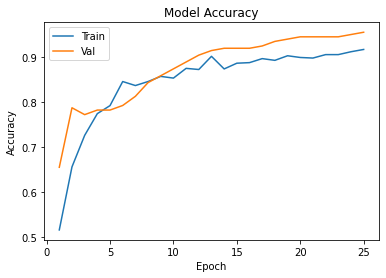

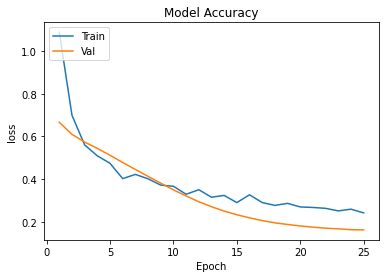

In [ ]:
learning_curve(history, 25)